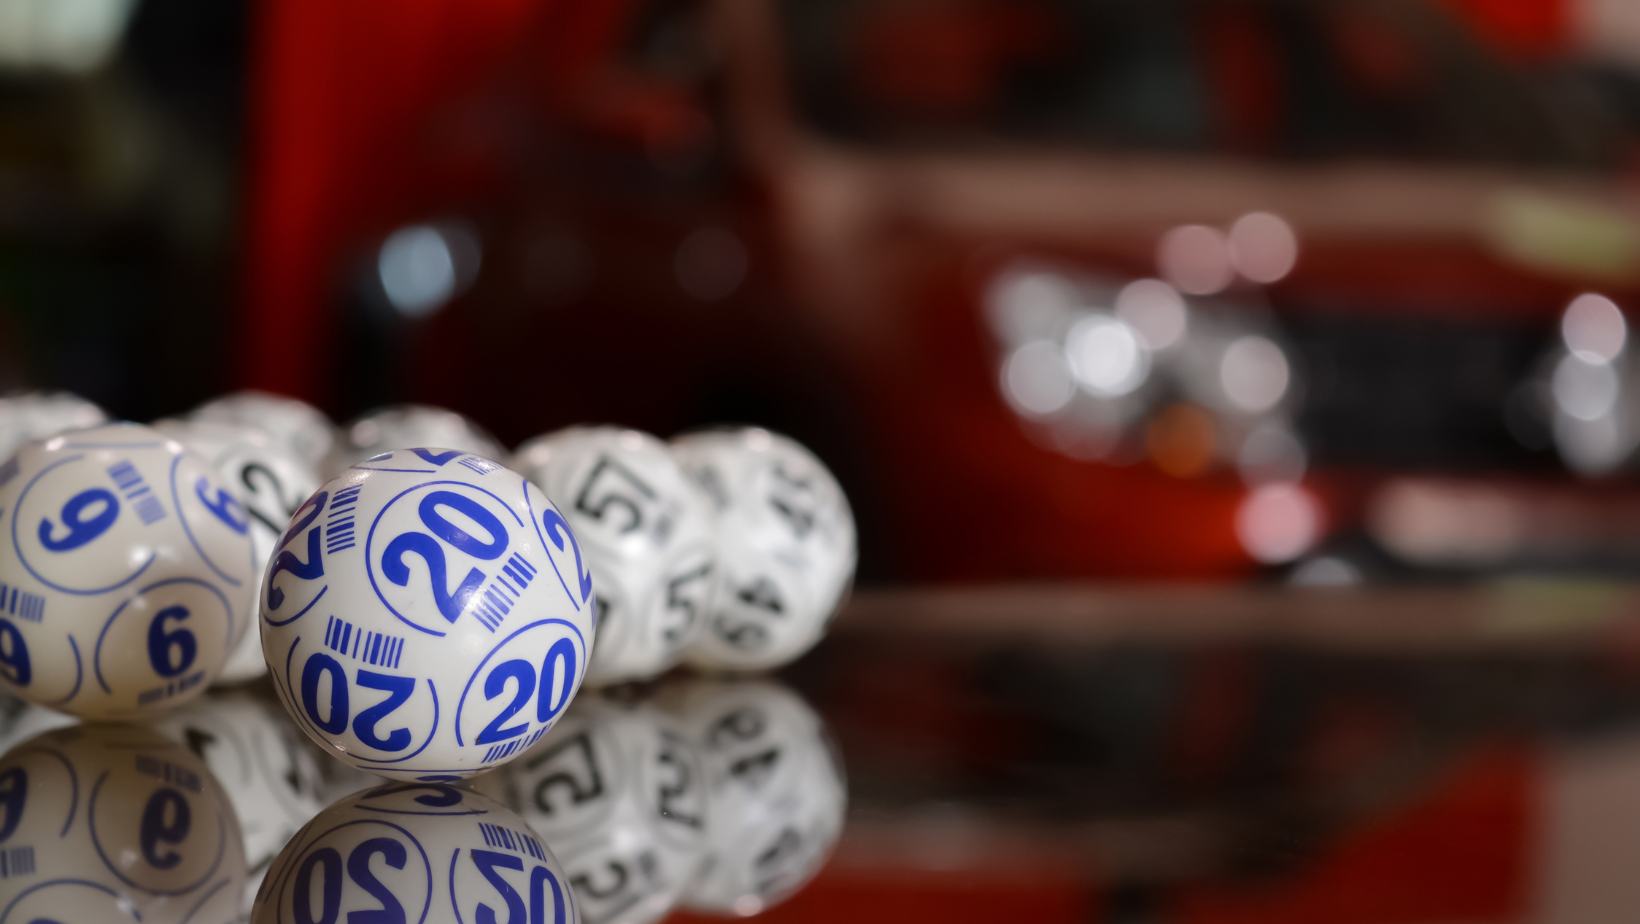

# ***ProbaSorte:*** *Explorando Padrões e Probabilidades nos Resultados da Loteria (1996-2016)*

*Bem-vindo ao fascinante mundo da análise de dados e probabilidades! Este projeto, realizado no ambiente interativo do Jupyter Notebook, propõe-se a explorar e decifrar os padrões por trás dos resultados de loteria no período de 1996 a 2016. Ao examinar meticulosamente os números sorteados, nossa missão é revelar insights valiosos, desde os números mais frequentes até as combinações menos usuais.*

### *Objetivo do Projeto:*

*Durante as últimas duas décadas, a loteria tem sido uma fonte de empolgação e especulação. Neste projeto, nosso objetivo é lançar luz sobre os seguintes aspectos:*

- *Análise de Frequência: Identificar os números que mais e menos frequentemente apareceram nos resultados da loteria ao longo do tempo.*

- *Probabilidades: Calcular e explorar as probabilidades associadas a diferentes números e combinações, oferecendo uma visão mais profunda sobre a aleatoriedade do sorteio.*

- *Sugestões Baseadas em Dados (Mês e Ano): Investigar se há padrões sazonais ou tendências específicas ao considerar meses ou anos específicos, fornecendo sugestões para escolhas mais informadas.*

### *Iniciando Projeto*

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando dados
path = 'C:/my_workspace/HACKTON/data/'
mega = pd.read_csv(path + 'megasena_dados_brutos.csv')

In [3]:
# primeiras impressões
mega.info()
mega.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Concurso                  1853 non-null   float64
 1   Data Sorteio              1853 non-null   object 
 2   1ª Dezena                 1853 non-null   float64
 3   2ª Dezena                 1853 non-null   float64
 4   3ª Dezena                 1853 non-null   float64
 5   4ª Dezena                 1853 non-null   float64
 6   5ª Dezena                 1853 non-null   float64
 7   6ª Dezena                 1853 non-null   float64
 8   Arrecadacao_Total         1853 non-null   object 
 9   Ganhadores_Sena           1853 non-null   float64
 10  Cidade                    1746 non-null   object 
 11  UF                        2032 non-null   object 
 12  Rateio_Sena               1853 non-null   object 
 13  Ganhadores_Quina          1853 non-null   float64
 14  Rateio_Q

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,...,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1.0,11/03/1996,4.0,5.0,30.0,33.0,41.0,52.0,0,0.0,...,,0,17.0,"39158,92",2016.0,"330,21",SIM,"1714650,23",0.0,0
1,2.0,18/03/1996,9.0,37.0,39.0,41.0,43.0,49.0,0,1.0,...,PR,"2307162,23",65.0,"14424,02",4488.0,"208,91",NÃO,0,0.0,0
2,3.0,25/03/1996,10.0,11.0,29.0,30.0,36.0,47.0,0,2.0,...,RN,"391192,51",62.0,"10515,93",4261.0,"153,01",NÃO,0,0.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,01/04/1996,1.0,5.0,6.0,27.0,42.0,59.0,0,0.0,...,,0,39.0,"15322,24",3311.0,"180,48",SIM,"717080,75",0.0,0


*Visto que iremos utilizar para o nosso projeto, apenas as colunas dos sorteios, data, cidade e estado.*

*Selecionaremos elas abaixo.*

In [93]:
df_mega = mega[['UF', 'Cidade'] + list(mega.iloc[:, 1:8])]

*Renomeando as colunas.*

In [95]:
df_mega.rename(columns={'Data Sorteio': 'data', '1ª Dezena': 'n1', '2ª Dezena': 'n2', '3ª Dezena': 'n3', '4ª Dezena': 'n4', '5ª Dezena': 'n5', '6ª Dezena': 'n6', 'UF': 'estado', 'Cidade': 'cidade'}, inplace=True)

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_7184\632549955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mega.rename(columns={'Data Sorteio': 'data', '1ª Dezena': 'n1', '2ª Dezena': 'n2', '3ª Dezena': 'n3', '4ª Dezena': 'n4', '5ª Dezena': 'n5', '6ª Dezena': 'n6', 'UF': 'estado', 'Cidade': 'cidade'}, inplace=True)


*Procurando por valores nulos.*

In [96]:
df_mega.isna().sum()

estado      0
cidade    286
data      179
n1        179
n2        179
n3        179
n4        179
n5        179
n6        179
dtype: int64

*Temos nulos e vamos calcular a proporção.*

In [97]:
print(df_mega.isna().sum() / df_mega.shape[0])

estado    0.000000
cidade    0.140748
data      0.088091
n1        0.088091
n2        0.088091
n3        0.088091
n4        0.088091
n5        0.088091
n6        0.088091
dtype: float64


*Removendo...*

In [98]:
df_mega= df_mega.dropna()

*Verificando.*

In [99]:
df_mega.isna().sum()

estado    0
cidade    0
data      0
n1        0
n2        0
n3        0
n4        0
n5        0
n6        0
dtype: int64

*Procurando por duplicados.*

In [100]:
df_mega.duplicated().sum()

0

*Sem duplicados.*

In [104]:
df_mega.sample(25)

,estado,cidade,data,n1,n2,n3,n4,n5,n6
1526,GO,JARAGUÁ,20/06/2012,34.0,39.0,43.0,56.0,57.0,60.0
1649,RJ,TERESÓPOLIS,03/07/2013,17.0,18.0,30.0,35.0,39.0,58.0
18,,,08/07/1996,23.0,27.0,36.0,37.0,42.0,56.0
460,,,08/02/2003,1.0,6.0,7.0,29.0,48.0,57.0
340,,,15/12/2001,11.0,18.0,29.0,44.0,47.0,56.0
1633,BA,SALVADOR,11/05/2013,7.0,12.0,24.0,27.0,30.0,49.0
1794,RJ,BARRA DO PIRAÍ,01/10/2014,2.0,6.0,18.0,23.0,31.0,46.0
1861,,,22/04/2015,8.0,23.0,30.0,51.0,53.0,58.0
1492,,,07/03/2012,5.0,16.0,24.0,32.0,38.0,46.0
1571,,,20/10/2012,4.0,15.0,45.0,47.0,50.0,52.0


*Olhando mais de perto a coluna estado e cidade.*

In [105]:
df_mega.estado.unique()

array(['\xa0', 'MG ', 'SP ', 'RJ ', 'PA ', 'PR ', 'SC ', 'ES ', 'DF ',
       'PE ', 'CE ', 'RS ', 'RO ', 'GO ', 'MA ', 'SE ', 'PI ', 'BA ',
       'AL ', 'MT ', 'MS ', 'AM ', 'RR ', 'RN '], dtype=object)

In [51]:
df_mega.reset_index(drop=True, inplace=True)

In [52]:
df_mega.head()

,estado,cidade,data,n1,n2,n3,n4,n5,n6
0,,,11/03/1996,4.0,5.0,30.0,33.0,41.0,52.0
1,,,01/04/1996,1.0,5.0,6.0,27.0,42.0,59.0
2,,,08/04/1996,1.0,2.0,6.0,16.0,19.0,46.0
3,,,15/04/1996,7.0,13.0,19.0,22.0,40.0,47.0
4,,,22/04/1996,3.0,5.0,20.0,21.0,38.0,56.0


*Transformando as colunas de float para int.*

In [54]:
df_mega.n1 = df_mega.n1.astype(int)
df_mega.n2 = df_mega.n2.astype(int)
df_mega.n3 = df_mega.n3.astype(int)
df_mega.n4 = df_mega.n4.astype(int)
df_mega.n5 = df_mega.n5.astype(int)
df_mega.n6 = df_mega.n6.astype(int)

*Ordenando por data.*

In [56]:
df_mega.sort_values(by='data', inplace=True)

*Transformando coluna data para formato date.*

In [58]:
df_mega['data'] = pd.to_datetime(df_mega['data'], errors='coerce')

C:\Users\THIAGO NAZARIO\AppData\Local\Temp\ipykernel_7184\52989256.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_mega['data'] = pd.to_datetime(df_mega['data'], errors='coerce')


In [60]:
df_mega['sorteio'] = df_mega['n1'].astype(str) + '-' + df_mega['n2'].astype(str) + '-' + df_mega['n3'].astype(str) + '-' + df_mega['n4'].astype(str) + '-' + df_mega['n5'].astype(str) + '-' + df_mega['n6'].astype(str)

In [61]:
df_mega.head()

,estado,cidade,data,n1,n2,n3,n4,n5,n6,sorteio
84,,,1998-01-02,14,29,30,46,48,51,14-29-30-46-48-51
364,,,2003-01-02,4,10,17,24,30,54,4-10-17-24-30-54
1156,,,2012-01-02,6,10,12,17,28,53,6-10-12-17-28-53
1367,,,2014-01-02,15,18,24,42,46,56,15-18-24-42-46-56
88,,,1998-01-03,1,4,13,21,38,52,1-4-13-21-38-52


In [62]:
df_mega['mes'] = df_mega['data'].dt.month
df_mega['ano'] = df_mega['data'].dt.year

In [63]:
df_mega

,estado,cidade,data,n1,n2,n3,n4,n5,n6,sorteio,mes,ano
84,,,1998-01-02,14,29,30,46,48,51,14-29-30-46-48-51,1,1998
364,,,2003-01-02,4,10,17,24,30,54,4-10-17-24-30-54,1,2003
1156,,,2012-01-02,6,10,12,17,28,53,6-10-12-17-28-53,1,2012
1367,,,2014-01-02,15,18,24,42,46,56,15-18-24-42-46-56,1,2014
88,,,1998-01-03,1,4,13,21,38,52,1-4-13-21-38-52,1,1998
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,CE,RUSSAS,2011-12-31,3,4,29,36,45,55,3-4-29-36-45-55,12,2011
1252,GO,APARECIDA DE GOIÂNIA,2012-12-31,14,32,33,36,41,52,14-32-33-36-41-52,12,2012
1357,AL,MACEIÓ,2013-12-31,20,30,36,38,47,53,20-30-36-38-47-53,12,2013
1462,DF,BRASÍLIA,2014-12-31,1,5,11,16,20,56,1-5-11-16-20-56,12,2014


In [64]:
nova_ordem_colunas = ['sorteio', 'ano', 'mes', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'data', 'estado', 'cidade']

# Reordene as colunas conforme a nova ordem
df_mega = df_mega[nova_ordem_colunas]
df_mega.head()

,sorteio,ano,mes,n1,n2,n3,n4,n5,n6,data,estado,cidade
84,14-29-30-46-48-51,1998,1,14,29,30,46,48,51,1998-01-02,,
364,4-10-17-24-30-54,2003,1,4,10,17,24,30,54,2003-01-02,,
1156,6-10-12-17-28-53,2012,1,6,10,12,17,28,53,2012-01-02,,
1367,15-18-24-42-46-56,2014,1,15,18,24,42,46,56,2014-01-02,,
88,1-4-13-21-38-52,1998,1,1,4,13,21,38,52,1998-01-03,,


In [65]:
df_mega.reset_index(drop=True, inplace=True)

In [66]:
df_mega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   sorteio  1651 non-null   object        
 1   ano      1651 non-null   int64         
 2   mes      1651 non-null   int64         
 3   n1       1651 non-null   int32         
 4   n2       1651 non-null   int32         
 5   n3       1651 non-null   int32         
 6   n4       1651 non-null   int32         
 7   n5       1651 non-null   int32         
 8   n6       1651 non-null   int32         
 9   data     1651 non-null   datetime64[ns]
 10  estado   1651 non-null   object        
 11  cidade   1651 non-null   object        
dtypes: datetime64[ns](1), int32(6), int64(2), object(3)
memory usage: 116.2+ KB


In [75]:
mapa = df_mega[['estado', 'cidade']]

In [82]:
mapa.estado.unique()
xao = mapa.loc[mapa['estado'] == '\xa0']

In [84]:
xao.value_counts()

estado  cidade
                  1432
dtype: int64

In [73]:
df_mega.estado.tail()

1646    CE 
1647    GO 
1648    AL 
1649    DF 
1650    AL 
Name: estado, dtype: object